# **Decision Tree Classification: 50 Points**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

**STEP 1: Importing all the required libraries.**

In [1]:
# Libraries for data analysis
import numpy as np # For large multi-dimensional array and matrix processing
import pandas as pd # For data extraction and preparation

#The sklearn.tree module includes decision tree-based models for classification and regression.
from sklearn import tree

# Libraries for displaying results and analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

**STEP 2: Importing Dataset**

We are going to be using the wine toy dataset from SciKit Learn

In [2]:
from sklearn.datasets import load_wine
wine_data = load_wine()

You can optionally print the Description of the dataset for your reference.

In [3]:
print(wine_data.data.shape)
print(wine_data.target.shape)
print(wine_data.DESCR)

(178, 13)
(178,)
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of 

**STEP 3: Split the Dataset (10 Points)**

**TO DO:** Similar to the KNN Tutorial, split the given X and y data into X_train, X_test, y_train, y_test, using **test ratio of 0.3 and random_state = 0**.

In [4]:
X = wine_data.data
y = wine_data.target

##### Use numpy arrays ######
X_train = None
y_train = None
X_test = None
y_test = None

##### INPUT CODE HERE (~1 line of code) ######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


##############################################

assert X_train.shape == (124,13)
assert y_train.shape == (124,)
assert X_test.shape == (54,13)
assert y_test.shape == (54,)

print("Size of training data= ", X_train.shape[0]," Samples")
print("Size of testing data= ", X_test.shape[0]," Samples")


Size of training data=  124  Samples
Size of testing data=  54  Samples


**STEP 4: Fit model to training data (10 Points)**

**TO DO:** Create a Decision Tree object (named decision_tree) with random state 0 and max depth of 3. Fit the given decision tree to X_train and y_train data. You may use [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) for reference.

In [5]:
decision_tree = None

##### INPUT CODE HERE (~1 line of code) ######
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)


##############################################

print("Simple Visualization of the tree you created:")
print(tree.export_text(decision_tree, feature_names=wine_data.feature_names))


Simple Visualization of the tree you created:
|--- color_intensity <= 3.82
|   |--- proline <= 1002.50
|   |   |--- ash <= 3.00
|   |   |   |--- class: 1
|   |   |--- ash >  3.00
|   |   |   |--- class: 0
|   |--- proline >  1002.50
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.58
|   |   |--- class: 2
|   |--- flavanoids >  1.58
|   |   |--- proline <= 737.00
|   |   |   |--- class: 1
|   |   |--- proline >  737.00
|   |   |   |--- class: 0



**STEP 5: Testing the model (10 Points)**

**TO DO:** Find target predictions by giving **X_test** input to your model and store them in **y_pred**. You may need [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) for reference.

In [6]:
y_pred = None

##### INPUT CODE HERE (~1 line of code) ######
y_pred = decision_tree.predict(X_test)


##############################################

**STEP 6: Visualize the Results  (20 Points)**

**TO DO:** Similar to the KNN Tutorial, plot confusion matrix, and accuracy of model predictions. Store accuracy in **acc** variable

You may need the following references:

[Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

[Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

[Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Accuracy of our model is equal to 94.44 %.


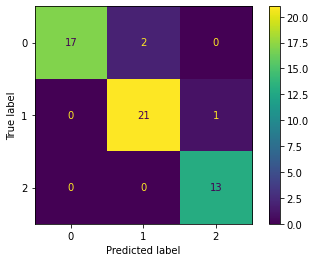

In [7]:
## Make sure to save your accuracy in the variable "acc"
acc = 0
##### INPUT CODE HERE (~4 line of code) ######
# Make sure you plot the confusion matrix, i.e. once this code cell is run, it should output a 3X3 confusion matrix and accuracy #

# confusion_matrix, accuracy_score, ConfusionMatrixDisplay.  decision_tree.classes_
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot()

acc = accuracy_score(y_test, y_pred)*100



##############################################

print('Accuracy of our model is equal to ' + str(round(acc, 2)) + ' %.')



---



# **Random Forest Regression: 40 Points**



Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:

**STEP 1: Importing all the required libraries.**

In [8]:
#The sklearn.ensemble module includes the RandomForest algorithm.
from sklearn.ensemble import RandomForestRegressor

# Libraries for calculating evaluation metrics
from sklearn.metrics import mean_squared_error

**STEP 2: Importing Dataset**

We are going to be using the California Housing dataset.
It contains 20640 samples with 8 dimensions to predict the value of a house.


In [9]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

You can optionally print the description and a few samples from the dataset for your reference.

In [10]:
print(housing_data.keys())
print(housing_data.data.shape)
print(housing_data.DESCR)

print(pd.DataFrame(housing_data.data)[:5])
print(pd.DataFrame(housing_data.target)[:5])


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
(20640, 8)
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California di

**STEP 3: Split the Dataset (10 Points)**

**TO DO:** Similar to the KNN Tutorial, split the given X and y data into X_train, X_test, y_train, y_test, using **test ratio of 0.3 and a random state of 0**.

In [11]:
X = housing_data.data
y = housing_data.target


##### Use numpy arrays ######
X_train = None
y_train = None
X_test = None
y_test = None


##### INPUT CODE HERE (~1 line of code) ######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


##############################################

assert X_train.shape == (14448, 8)
assert y_train.shape == (14448,)
assert X_test.shape == (6192, 8)
assert y_test.shape == (6192,)

print("Size of training data= ", X_train.shape[0]," Samples")
print("Size of testing data= ", X_test.shape[0]," Samples")


Size of training data=  14448  Samples
Size of testing data=  6192  Samples


**STEP 4: Fit model to training data (10 Points)**

**TO DO:** Fit the given decision tree to X_train and y_train data. You may use [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) for reference.

In [12]:
model = RandomForestRegressor()

##### INPUT CODE HERE (~1 line of code) ######
model.fit(X_train, y_train)


##############################################

RandomForestRegressor()

**STEP 4: Try Predicting Values**

**TO DO (optional) :** Change values of features to see changes in the predicted value of house

In [13]:
# this is an example test case depicting how the prediction is done on a test data point.

val1 = 8.3252
val2 = 41.0
val3 = 6.984127
val4 = 1.023810
val5 = 322.0
val6 = 2.555556
val7 = 37.88
val8 = -122.23

row = [[val1, val2, val3, val4, val5, val6, val7, val8]]

# make a single prediction
yhat = model.predict(row)

print('House Value Prediction= $',yhat[0]*100000)

House Value Prediction= $ 446238.1200000003


**STEP 5: Testing the model (10 Points)**

**TO DO:** Find target predictions by giving **X_test** input to your model and store them in **y_pred**. You may need [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) for reference.

In [14]:
y_pred = None

##### INPUT CODE HERE (~1 line of code) ######
y_pred = model.predict(X_test)


##############################################

**STEP 6: Visualize the Results (10 Points)**

**TO DO:** Since this is not a classification task, we cannot plot confusion matrix. Instead we ask you to find the mean square error evaluated on all the testing data and store it in **mse**.

You may need the following reference:

[Mean Square Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


In [15]:
mse = None

##### INPUT CODE HERE (~1 line of code) ######
mse = mean_squared_error(y_test, y_pred)


##############################################

print("Mean Squared Error = ",mse)

Mean Squared Error =  0.2747291658775977




---



# **Hyperparameter Tuning**

**STEP 1: Hyperparameter Tuning (10 Points)**

**TO DO:** Given the different range of the hyper parameters, tune them using grid search to get the value of these variables to get the best model is. Make sure the grid search is run for **5 rounds** of cross validation using **negative mean squared error**. 


In [24]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = [
    {'n_estimators': [10, 50, 100], 'max_features': [4, 5, 6 ], 'max_depth': [6, 7, 8, 9]}
]

#Use Random Forests
forest_reg = RandomForestRegressor()

##############################################
grid_search = None
# Write the code for hyperparameter tuning using Grid Search for the above parameters
# Carry out the grid search and fit the data on the above variable -> "grid_search"
grid_search = GridSearchCV(forest_reg, param_grid, scoring='neg_mean_squared_error', cv=5).fit(X_train, y_train)

##############################################

In [28]:
# Display the best parameter combination
grid_search.best_params_

{'max_depth': 9, 'max_features': 4, 'n_estimators': 100}

# **FYI Only**
# The below code is for you to learn more about Random Forest and will not be graded

This section is for your information only. Simply run the code cells one by one.

We will take a closer look at some of the hyperparameters you should consider tuning for the random forest ensemble and their effect on model performance.

We select the hyperparameters that give us the lowest error rate or Mean Square Error in this case.

First we define a function to evaluate a model using the mean square error metric.

In [16]:
def find_mse(model, X, y):

  yhat = model.predict(X)
  mse = mean_squared_error(y,yhat) 

  return mse

Next we define a function to test out various models and plot how the Mean Square Error evolves with respect to the hyperparameter in question.

In [17]:
from matplotlib import pyplot

def plot_tuning(models_dict,X_train,X_test,y_train,y_test):

  results, names = list(), list()

  for name, model in models_dict.items():

    model.fit(X_train, y_train)
    mse = find_mse(model, X_test, y_test)
  
    results.append(mse)
    names.append(name)
    print("Hyperparameter= ",name,"; MSE = ",mse)


    n = [float(i) for i in names]

  pyplot.plot(n,results)
  pyplot.ylabel('Mean Square Error')
  pyplot.xlabel('Hyperparameter')
  pyplot.show()

**Hyperparameter:** max_samples.

The **max_samples** argument can be set to a float between 0 and 1 to control the percentage of the size of the training dataset to make the sample used to train each decision tree. **None** means that the entire training set will be used to train each tree.

In [18]:
#Store various models into a dictionary of models
models_dict = dict()
for i in np.arange(0.1, 1.1, 0.1):
  # set max_samples=None to use 100%
  key = round(i,2)
  if i == 1.0:
    i = None
  models_dict[key] = RandomForestRegressor(max_samples=i)
  

Hyperparameter=  0.1 ; MSE =  0.32833826502440094
Hyperparameter=  0.2 ; MSE =  0.3081363156243986
Hyperparameter=  0.3 ; MSE =  0.2927310375312389
Hyperparameter=  0.4 ; MSE =  0.2869925091389695
Hyperparameter=  0.5 ; MSE =  0.28426442229309357
Hyperparameter=  0.6 ; MSE =  0.2805287428267709
Hyperparameter=  0.7 ; MSE =  0.2753873250832573
Hyperparameter=  0.8 ; MSE =  0.2736222191259319
Hyperparameter=  0.9 ; MSE =  0.2742847629620748
Hyperparameter=  1.0 ; MSE =  0.2721990028393614


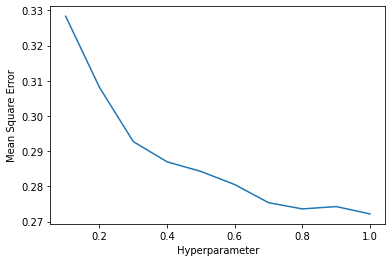

In [19]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)

**Hyperparameter:** max_features.

The number of features that is randomly sampled for each split point is perhaps the most important feature to configure for random forest.

In [ ]:
#Store various models into a dictionary of models
models_dict = dict()

for i in range(1,8):
  models_dict[str(i)] = RandomForestRegressor(max_features=i)


Hyperparameter=  1 ; MSE =  0.2865586812257966
Hyperparameter=  2 ; MSE =  0.24910688025202163
Hyperparameter=  3 ; MSE =  0.24944304923864297
Hyperparameter=  4 ; MSE =  0.2540869861445937
Hyperparameter=  5 ; MSE =  0.26347056453885054
Hyperparameter=  6 ; MSE =  0.26772719300231723
Hyperparameter=  7 ; MSE =  0.26981497974488927


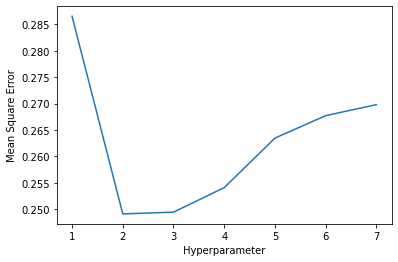

In [ ]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)

**Hyperparameter:** n_estimators.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case.

In [ ]:
#Store various models into a dictionary of models
models_dict = dict()

n_trees = [10, 50, 100, 500, 1000]
for n in n_trees:
  models_dict[str(n)] = RandomForestRegressor(n_estimators=n)

Hyperparameter=  10 ; MSE =  0.29968748035990644
Hyperparameter=  50 ; MSE =  0.2779698625716785
Hyperparameter=  100 ; MSE =  0.2738768435819985
Hyperparameter=  500 ; MSE =  0.2731771655871612
Hyperparameter=  1000 ; MSE =  0.27166276118370025


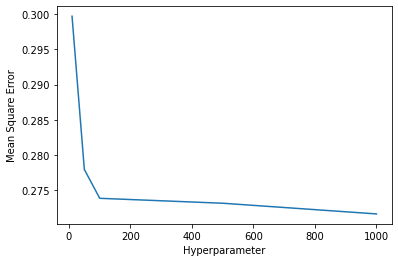

In [ ]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)